# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [40]:
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"


# Set the path to the file we would like to analyze
pl.setLogPath("datasets/gc.log")

In [ ]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

### Begin processing log information. Plots data and trends

In [ ]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
table_young_pauses = pl.getPauses(create_csv = False)

# plot the data for pauses, printing to output the trends.
dplt.plot_pauses(table_young_pauses)

# To inspect more information about this, access the variable "table_ypauses"
# TODO: Transform second table into line graph

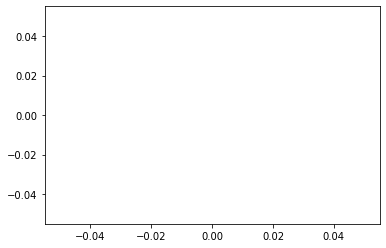

In [45]:
''' Analyze heap allocation througout the program '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
heap_allocation_sections = pl.getHeapAllocation(create_csv = False)

# plot the data for pauses, printing to output the trends.
dplt.plot_heap_allocation_breakdown(heap_allocation_sections)



###Below is just testing. Temporary below.